In [40]:
!pip install ipython
!pip install seaborn

In [41]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.simplefilter('ignore')

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [110]:
data =pd.read_csv('../Data/attacks.csv', encoding='latin1')
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# Modifico el nombre de las columnas a minusculas y le quito los espacios.

data.columns=[c.lower().replace(' ', '_') for c in data.columns]
data.columns=[c.lower().replace(':', '') for c in data.columns]
data.columns=[c.lower().replace('.', '_') for c in data.columns]
data.columns=[c.lower().replace('(', '') for c in data.columns]
data.columns=[c.lower().replace(')', '') for c in data.columns]
data.columns=[c.lower().replace('/', '_') for c in data.columns]

In [112]:
data.shape

(25723, 24)

In [113]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_y_n               5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null 

In [114]:
data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed_22',
       'unnamed_23'],
      dtype='object')

In [115]:
nan_cols=data.isna().sum()
nan_cols.head()

case_number    17021
date           19421
year           19423
type           19425
country        19471
dtype: int64

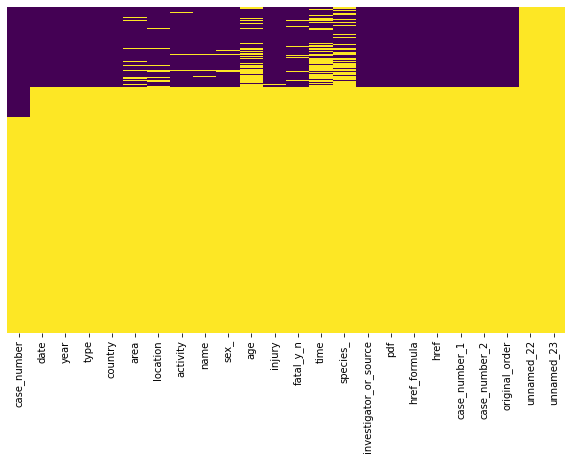

In [132]:
plt.figure(figsize=(10, 6))

sns.heatmap(data.isna(),  # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False);

In [116]:
# Me creo un dataset con las filas que son todo nulos.

data_null = data[data.isna().all(axis=1)]


In [117]:
# Me creo un subset con las filas que tiene al menos dato.

data_analys = data[data.notna().any(axis=1)]


In [118]:
data_analys.shape

(8703, 24)

In [126]:
# Sustituyo todos los valores de la columna unnamed_22 y unnamed_23

data_analys.unnamed_22 = 'unknown'
data_analys.unnamed_23 = 'unknown'


In [127]:
data_analys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_y_n               5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null  

In [128]:
# Comprobar si hay duplicados, comprobando el numero de filas es la misma

len(data_analys.drop_duplicates())==len(data_analys)  

False

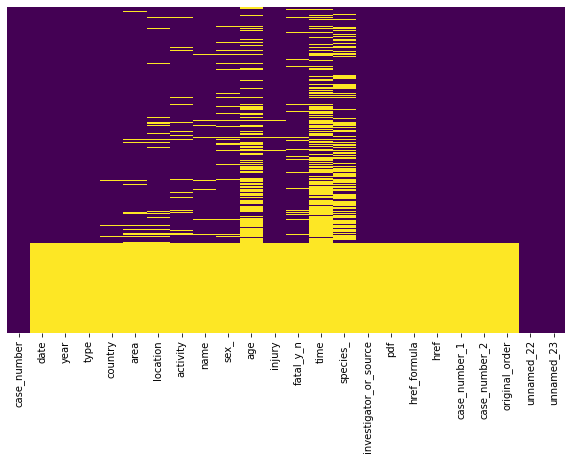

In [131]:
plt.figure(figsize=(10, 6))

sns.heatmap(data_analys.isna(),  # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False);

In [134]:
data_analys.year.isna().sum()

2403

In [156]:
# Creo un dataset en la que elimino columnas con las que quiero filtras.

filters_cols = data_analys.columns.drop(['case_number', 'original_order', 'unnamed_22', 'unnamed_23'])

# Me creo un data set con lo que elimino


data_null2 = data_analys[data_analys[filters_cols].isnull().all(axis=1)]

# Me creo un dataset mas limpio con el que voy a seguir trabajando


data_analizar = data_analys[data_analys[filters_cols].notnull().any(axis=1)]


,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_y_n,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0,unknown,unknown
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0,unknown,unknown
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,unknown,unknown
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,unknown,unknown
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown


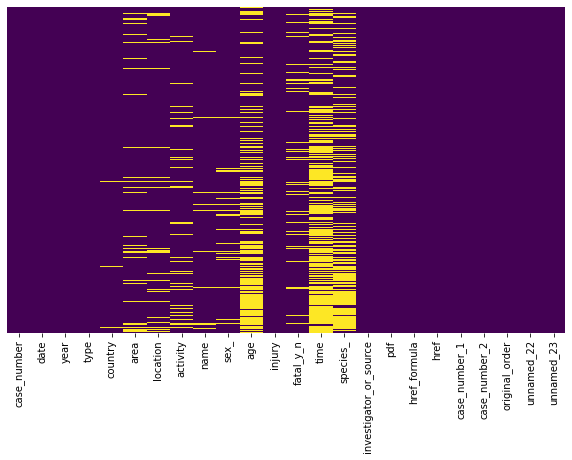

In [151]:
plt.figure(figsize=(10, 6))

sns.heatmap(data_analizar.isna(),  # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False);

In [173]:
data_analizar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6301 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_y_n               5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null   

In [157]:
len(data_analizar)

6302

In [162]:
pd.set_option('display.max_rows', None)

In [165]:
# Compruebo si hay duplicado, en este caso no los hay

len(data_analizar.drop_duplicates())==len(data_analizar)

True

## Empiezo a analizar mi subset 


In [169]:
data_analizar.case_number.head() 

0    2018.06.25
1    2018.06.18
2    2018.06.09
3    2018.06.08
4    2018.06.04
Name: case_number, dtype: object

In [168]:
data_analizar.case_number.value_counts().head()

1983.06.15      2
1913.08.27.R    2
2009.12.18      2
2014.08.02      2
1920.00.00.b    2
Name: case_number, dtype: int64

In [172]:
data_analizar.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed_22',
       'unnamed_23'],
      dtype='object')

In [ ]:
# Reviso case_number y está todo en orden

In [176]:
data_analizar.case_number.isnull().sum()

1

In [178]:
# Remplazo los valores nulos en la columna con "unknown"
data_analizar.case_number.fillna("unknown", inplace=True)

In [180]:
data_analizar.date

0                                             25-Jun-2018
1                                             18-Jun-2018
2                                             09-Jun-2018
3                                             08-Jun-2018
4                                             04-Jun-2018
5                                             03-Jun-2018
6                                             03-Jun-2018
7                                             27-May-2018
8                                             26-May-2018
9                                             26-May-2018
10                                            24-May-2018
11                                            21-May-2018
12                                            13-May-2018
13                                            13-May-2018
14                                               May 2018
15                                            12-May-2018
16                                            09-May-2018
17            